In [1]:
from sqlalchemy import create_engine
import pandas as pd
import datetime as dt

In [2]:
# connecting to mta.db database

engine = create_engine("sqlite:///mta.db")

In [3]:
# viewing table names within mta.db

engine.table_names()

['MTA_2019_20']

In [4]:
# viewing all data from table 'MTA_2017_20'

turnstiles_df= pd.read_sql('SELECT * FROM MTA_2019_20;', engine)

turnstiles_df.head() 

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,00:00:00,REGULAR,7247322,2455491
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,04:00:00,REGULAR,7247336,2455499
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,08:00:00,REGULAR,7247351,2455532
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,12:00:00,REGULAR,7247463,2455623
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,16:00:00,REGULAR,7247755,2455679


In [5]:
turnstiles_df.columns

Index(['index', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [6]:
# dropping the redundant 'index' column

turnstiles_df = turnstiles_df.drop(columns=['index'])

# stripping any spaces on column names, as column 'EXITS' has extra spaces

turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [7]:
turnstiles_df.DATE.value_counts().sort_index()

01/01/2020    29428
01/02/2020    30048
01/03/2020    29261
01/04/2020    29439
01/05/2020    29848
              ...  
12/27/2019    29423
12/28/2019    29437
12/29/2019    29384
12/30/2019    29607
12/31/2019    29334
Name: DATE, Length: 91, dtype: int64

In [8]:
# creating datetime column with pandas.to_datime

turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME,
                                           format="%m/%d/%Y %H:%M:%S")
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,00:00:00,REGULAR,7247322,2455491,2019-10-26 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,04:00:00,REGULAR,7247336,2455499,2019-10-26 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,08:00:00,REGULAR,7247351,2455532,2019-10-26 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,12:00:00,REGULAR,7247463,2455623,2019-10-26 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,16:00:00,REGULAR,7247755,2455679,2019-10-26 16:00:00


In [ ]:
turnstiles_df.DESC.value_counts()

REGULAR       2666663
RECOVR AUD      11775
Name: DESC, dtype: int64

In [ ]:
# removing duplicate rows
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"],
                         inplace=True, ascending=False)

turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                              inplace=True)

# removing rows with 'RECOVR AUD' in column 'DESC'
recovr_aud_index = turnstiles_df[turnstiles_df['DESC'] == 'RECOVR AUD'].index

turnstiles_df.drop(recovr_aud_index, inplace=True)

In [ ]:
# checking that all RECOVR_AUD rows have been dropped
turnstiles_df.DESC.value_counts()

REGULAR    2666663
Name: DESC, dtype: int64

In [ ]:
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("DATE_TIME", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1648830,PTH22,R540,00-02-06,PATH NEW WTC,2020-01-24 23:59:42,1
1564430,PTH10,R547,00-00-00,9TH STREET,2020-01-24 23:56:51,1
1609123,PTH18,R549,01-00-04,NEWARK BM BW,2020-01-24 23:54:19,1
1520000,PTH03,R552,00-01-06,JOURNAL SQUARE,2020-01-24 23:53:41,1
1646756,PTH22,R540,00-02-02,PATH NEW WTC,2020-01-24 23:52:29,1


In [ ]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
2678437,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/24/2020,20:00:00,REGULAR,5554,420,2020-01-24 20:00:00
2678436,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/24/2020,16:00:00,REGULAR,5554,420,2020-01-24 16:00:00
2678435,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/24/2020,12:00:00,REGULAR,5554,420,2020-01-24 12:00:00
2678434,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/24/2020,08:00:00,REGULAR,5554,420,2020-01-24 08:00:00
2678433,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/24/2020,04:00:00,REGULAR,5554,420,2020-01-24 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,16:00:00,REGULAR,7247755,2455679,2019-10-26 16:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,12:00:00,REGULAR,7247463,2455623,2019-10-26 12:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,08:00:00,REGULAR,7247351,2455532,2019-10-26 08:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,04:00:00,REGULAR,7247336,2455499,2019-10-26 04:00:00


In [ ]:
# creating a new dataframe of daily turnstile entries & exits
turnstiles_daily = (turnstiles_df
                    .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"], as_index=False)
                   ['ENTRIES','EXITS'].first())

<ipython-input-14-d012e763bb33>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily = (turnstiles_df


In [ ]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,01/01/2020,7328499,2483910
1,A002,R051,02-00-00,59 ST,01/02/2020,7329882,2484375
2,A002,R051,02-00-00,59 ST,01/03/2020,7331169,2484839
3,A002,R051,02-00-00,59 ST,01/04/2020,7331951,2485166
4,A002,R051,02-00-00,59 ST,01/05/2020,7332543,2485396


In [ ]:
# creating previous date, previous entries, and previous exits columns
# to obtain daily values by subtracting cumulative values
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (turnstiles_daily
                                                                    .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE","ENTRIES","EXITS"]
                                                                    .apply(lambda grp: grp.shift(1)))

<ipython-input-16-99f05e29d0c6>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (turnstiles_daily


In [ ]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,01/01/2020,7328499,2483910,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/02/2020,7329882,2484375,01/01/2020,7328499.0,2483910.0
2,A002,R051,02-00-00,59 ST,01/03/2020,7331169,2484839,01/02/2020,7329882.0,2484375.0
3,A002,R051,02-00-00,59 ST,01/04/2020,7331951,2485166,01/03/2020,7331169.0,2484839.0
4,A002,R051,02-00-00,59 ST,01/05/2020,7332543,2485396,01/04/2020,7331951.0,2485166.0


In [ ]:
# dropping values with empty rows (no previous date/entries/exits)
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [ ]:
# checking that rows with NaN values have been dropped
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
1,A002,R051,02-00-00,59 ST,01/02/2020,7329882,2484375,01/01/2020,7328499.0,2483910.0
2,A002,R051,02-00-00,59 ST,01/03/2020,7331169,2484839,01/02/2020,7329882.0,2484375.0
3,A002,R051,02-00-00,59 ST,01/04/2020,7331951,2485166,01/03/2020,7331169.0,2484839.0
4,A002,R051,02-00-00,59 ST,01/05/2020,7332543,2485396,01/04/2020,7331951.0,2485166.0
5,A002,R051,02-00-00,59 ST,01/06/2020,7333879,2485925,01/05/2020,7332543.0,2485396.0


In [ ]:
# making sure that previous entries are larger than current entries
# turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

In [ ]:
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION      
A002   R051  02-00-00  59 ST            1
             02-00-01  59 ST            1
             02-03-00  59 ST            1
             02-03-01  59 ST            1
             02-03-02  59 ST            1
                                       ..
TRAM2  R469  00-00-00  RIT-ROOSEVELT    1
             00-00-01  RIT-ROOSEVELT    1
             00-03-00  RIT-ROOSEVELT    1
             00-03-01  RIT-ROOSEVELT    1
             00-05-00  RIT-ROOSEVELT    1
Length: 4649, dtype: int64

In [ ]:
# function for getting daily entries column
def daily_entries(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
        
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        
    if counter > max_counter:
        return 0
    return counter

turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(daily_entries, axis=1, max_counter=1000000)

85130869 476777.0
459077 85175465.0
3823824 108991.0
263 3846402.0
2137518 63600.0
864 2152170.0
1771576 170535719.0
170526823 1802952.0
1730 1455549.0
1343785 30234.0
2175340 129829.0
1041 2210879.0
6817400 110492.0
973 6844908.0
49 8294808.0
8176868 13873.0
507 2379734.0
2313292 18973.0
7 2344491.0
2312899 724.0
10356049 395553.0
5421 10392294.0
5967356 215960.0
2157 6026406.0
10 11957933.0
11823893 6032.0
673 4895014.0
4827775 6682.0
4785471 11470775.0
11337848 4798034.0
19739139 181607.0
2204 19783118.0
270532819 536177.0
505408 270535090.0
1062 2302008.0
2152137 19861.0
395233 2064683.0
1855070 413482.0
117440512 458752.0
458752 117440512.0
2010 22737699.0
22401841 42368.0
455 3854804.0
3740504 7366.0
3 69161601.0
69010916 14.0
1087 9501355.0
9425521 3211.0
1077 8438239.0
8363053 49.0
1840785 173405.0
3728 1842366.0
655360 3529766.0
3518390 589.0
4408208 1009744.0
2069 4443445.0
6620238 84206.0
178 6625781.0
864164 5001368.0
4982302 877264.0
3200558 16324.0
582 3243165.0
67120006 

In [ ]:
# function for getting daily exits column

def daily_exits(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        counter = -counter
        
    if counter > max_counter:
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
        
    if counter > max_counter:
        return 0
    return counter

turnstiles_daily["DAILY_EXITS"] = turnstiles_daily.apply(daily_exits, axis=1, max_counter=1000000)

1245640 99656.0
82664 1292529.0
9687072 334913.0
618 9756892.0
1273335 788540225.0
788531266 1306274.0
1112809 65765.0
726 1130345.0
3977622 72180.0
832 3994495.0
193 6728678.0
6618869 13907.0
120 1117134.0
1093196 6822.0
29 7223168.0
7131799 2696.0
2481398 116773.0
761 2493061.0
110 1019563.0
793 2273628.0
2099303 9144.0
122 2149320.0
2124202 2174.0
132255 5311986.0
5234241 138592.0
11130932 102392.0
1016 11154770.0
880808202 44277.0
26957 880809459.0
3776 6339905.0
5919164 61132.0
67404 1772207.0
1603053 84138.0
431 6230854.0
6120435 14368.0
91 2021925.0
1937577 4537.0
362 17180829.0
17154120 1.0
1443 7494344.0
7399769 4155.0
925 4816664.0
4746369 36.0
5135152 38714.0
823 5183836.0
8342520 55252.0
492 8345610.0
4442793 16381.0
575 4484776.0
4395226 32190.0
582 4444194.0
150933508 5389.0
14442467 150898963.0
18615998 31168.0
1156 18785683.0
862 8005510.0
7887067 30638.0
1621 13737367.0
13474438 9850.0
2048961127 12628970.0
12514572 2048983533.0
1570 2048959791.0
2048805249 20429.0
319

In [ ]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,01/02/2020,7329882,2484375,01/01/2020,7328499.0,2483910.0,1383.0,465.0
2,A002,R051,02-00-00,59 ST,01/03/2020,7331169,2484839,01/02/2020,7329882.0,2484375.0,1287.0,464.0
3,A002,R051,02-00-00,59 ST,01/04/2020,7331951,2485166,01/03/2020,7331169.0,2484839.0,782.0,327.0
4,A002,R051,02-00-00,59 ST,01/05/2020,7332543,2485396,01/04/2020,7331951.0,2485166.0,592.0,230.0
5,A002,R051,02-00-00,59 ST,01/06/2020,7333879,2485925,01/05/2020,7332543.0,2485396.0,1336.0,529.0


In [ ]:
turnstiles_daily['YEAR'] = pd.to_datetime(turnstiles_daily['DATE']).dt.year
turnstiles_daily['MONTH'] = pd.to_datetime(turnstiles_daily['DATE']).dt.month
turnstiles_daily['DAY_OF_MONTH'] = pd.to_datetime(turnstiles_daily['DATE']).dt.day
turnstiles_daily['WEEK_OF_YEAR'] = pd.to_datetime(turnstiles_daily['DATE']).dt.week

<ipython-input-25-53412785fd63>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  turnstiles_daily['WEEK_OF_YEAR'] = pd.to_datetime(turnstiles_daily['DATE']).dt.week


In [ ]:
turnstiles_daily[(turnstiles_daily['STATION']=='34 ST-PENN STA') &
                 (pd.to_datetime(turnstiles_daily['DATE']).dt.month==1) &
                 (pd.to_datetime(turnstiles_daily['DATE']).dt.week.isin(range(3,5)))
                  ] 

<ipython-input-26-3286ca89870a>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  (pd.to_datetime(turnstiles_daily['DATE']).dt.week.isin(range(3,5)))


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,YEAR,MONTH,DAY_OF_MONTH,WEEK_OF_YEAR
115650,N067,R012,00-00-00,34 ST-PENN STA,01/13/2020,161042,479940,01/12/2020,160321.0,477318.0,721.0,2622.0,2020,1,13,3
115651,N067,R012,00-00-00,34 ST-PENN STA,01/14/2020,161706,482284,01/13/2020,161042.0,479940.0,664.0,2344.0,2020,1,14,3
115652,N067,R012,00-00-00,34 ST-PENN STA,01/15/2020,162443,484561,01/14/2020,161706.0,482284.0,737.0,2277.0,2020,1,15,3
115653,N067,R012,00-00-00,34 ST-PENN STA,01/16/2020,163165,486928,01/15/2020,162443.0,484561.0,722.0,2367.0,2020,1,16,3
115654,N067,R012,00-00-00,34 ST-PENN STA,01/17/2020,163853,488926,01/16/2020,163165.0,486928.0,688.0,1998.0,2020,1,17,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299188,R142,R293,01-06-01,34 ST-PENN STA,01/20/2020,68010189,18630260,01/19/2020,68009778.0,18629492.0,411.0,768.0,2020,1,20,4
299189,R142,R293,01-06-01,34 ST-PENN STA,01/21/2020,68010727,18631384,01/20/2020,68010189.0,18630260.0,538.0,1124.0,2020,1,21,4
299190,R142,R293,01-06-01,34 ST-PENN STA,01/22/2020,68011267,18632625,01/21/2020,68010727.0,18631384.0,540.0,1241.0,2020,1,22,4
299191,R142,R293,01-06-01,34 ST-PENN STA,01/23/2020,68011840,18633686,01/22/2020,68011267.0,18632625.0,573.0,1061.0,2020,1,23,4


In [ ]:
# grouping by station and date

stations_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES','DAILY_EXITS']].sum().reset_index()
stations_daily.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
0,1 AV,01/02/2020,15443.0,17949.0
1,1 AV,01/03/2020,16168.0,18683.0
2,1 AV,01/04/2020,6930.0,7771.0
3,1 AV,01/05/2020,5586.0,6176.0
4,1 AV,01/06/2020,16560.0,18893.0


In [ ]:
# creating year, month, day of month, and week of year columns

stations_daily['YEAR'] = pd.to_datetime(stations_daily['DATE']).dt.year
stations_daily['MONTH'] = pd.to_datetime(stations_daily['DATE']).dt.month
stations_daily['DAY_OF_MONTH'] = pd.to_datetime(stations_daily['DATE']).dt.day
stations_daily['WEEK_OF_YEAR'] = pd.to_datetime(stations_daily['DATE']).dt.week
stations_daily['DAY_OF_WEEK'] = pd.to_datetime(stations_daily['DATE']).dt.dayofweek

<ipython-input-28-9180df2ebb7c>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  stations_daily['WEEK_OF_YEAR'] = pd.to_datetime(stations_daily['DATE']).dt.week


In [ ]:
# grouping stations data by year

stations_daily.groupby('YEAR')

# sorting values by station, year, month, day of month, and week of year

# in this sort, 'YEAR' is first and 'WEEK_OF_YEAR' is last because January begins at the beginning of next year
# and I don't want the dataframe to be ordered as Jan 2020, Nov 2019, Dec 2019

stations_daily.sort_values(by=['STATION','YEAR', 'MONTH', 'DAY_OF_MONTH', 'WEEK_OF_YEAR'], ascending=[True, True, True, True, True],inplace=True)

In [ ]:
stations_daily

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,YEAR,MONTH,DAY_OF_MONTH,WEEK_OF_YEAR,DAY_OF_WEEK
23,1 AV,10/26/2019,1173018.0,1288679.0,2019,10,26,43,5
24,1 AV,10/27/2019,5902.0,6736.0,2019,10,27,43,6
25,1 AV,10/28/2019,16886.0,18725.0,2019,10,28,44,0
26,1 AV,10/29/2019,18475.0,20644.0,2019,10,29,44,1
27,1 AV,10/30/2019,19148.0,20500.0,2019,10,30,44,2
...,...,...,...,...,...,...,...,...,...
33884,ZEREGA AV,01/20/2020,1429.0,1384.0,2020,1,20,4,0
33885,ZEREGA AV,01/21/2020,2647.0,2496.0,2020,1,21,4,1
33886,ZEREGA AV,01/22/2020,2755.0,2576.0,2020,1,22,4,2
33887,ZEREGA AV,01/23/2020,2730.0,2392.0,2020,1,23,4,3


In [ ]:
# checking that all months are November, December, and January

# indices with 'False' indicate that those rows are outside of the list
# of desired months

stations_daily['MONTH'].isin([11,12,1])

23       False
24       False
25       False
26       False
27       False
         ...  
33884     True
33885     True
33886     True
33887     True
33888     True
Name: MONTH, Length: 33956, dtype: bool

In [ ]:
# returning all unique months in 'MONTH' column
stations_daily['MONTH'].unique()

array([10, 11, 12,  1])

In [ ]:
# removing rows with month = 10 (October)

stations_daily = stations_daily[stations_daily['MONTH'] != 10]

# checking that october dates have been removed
stations_daily['MONTH'].unique()

array([11, 12,  1])

In [ ]:
# sanity check
stations_daily['MONTH'].isin([11,12,1])

29       True
30       True
31       True
32       True
33       True
         ... 
33884    True
33885    True
33886    True
33887    True
33888    True
Name: MONTH, Length: 31694, dtype: bool

In [ ]:
stations_daily.columns

Index(['STATION', 'DATE', 'DAILY_ENTRIES', 'DAILY_EXITS', 'YEAR', 'MONTH',
       'DAY_OF_MONTH', 'WEEK_OF_YEAR', 'DAY_OF_WEEK'],
      dtype='object')

In [ ]:
# creating station totals dataframe to find highest used stations across Nov - Jan
# checking by entry numbers
station_total_entries = (stations_daily.groupby('STATION').sum()
                 .sort_values("DAILY_ENTRIES", ascending=False).reset_index())

station_total_entries.head()

,STATION,DAILY_ENTRIES,DAILY_EXITS,YEAR,MONTH,DAY_OF_MONTH,WEEK_OF_YEAR,DAY_OF_WEEK
0,34 ST-PENN STA,11794441.0,11754961.0,169619,725,1260,2909,254
1,GRD CNTRL-42 ST,10743343.0,11177607.0,169619,725,1260,2909,254
2,23 ST,9961546.0,8530306.0,169619,725,1260,2909,254
3,34 ST-HERALD SQ,9714506.0,9333384.0,169619,725,1260,2909,254
4,42 ST-PORT AUTH,7477318.0,6187757.0,169619,725,1260,2909,254


In [ ]:
# checking by exit numbers
station_total_exits = (stations_daily.groupby('STATION').sum()
                 .sort_values("DAILY_EXITS", ascending=False).reset_index())

station_total_exits.head()

,STATION,DAILY_ENTRIES,DAILY_EXITS,YEAR,MONTH,DAY_OF_MONTH,WEEK_OF_YEAR,DAY_OF_WEEK
0,34 ST-PENN STA,11794441.0,11754961.0,169619,725,1260,2909,254
1,GRD CNTRL-42 ST,10743343.0,11177607.0,169619,725,1260,2909,254
2,34 ST-HERALD SQ,9714506.0,9333384.0,169619,725,1260,2909,254
3,23 ST,9961546.0,8530306.0,169619,725,1260,2909,254
4,TIMES SQ-42 ST,7095710.0,6954011.0,169619,725,1260,2909,254


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, '')

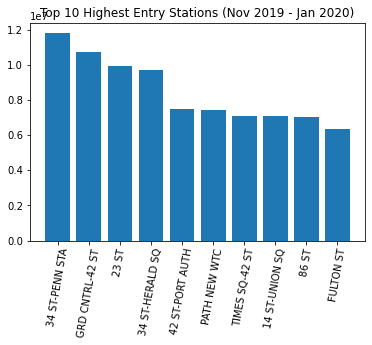

In [ ]:
# bar plot of highest entry stations
plt.bar(x=station_total_entries['STATION'][:10], height=station_total_entries['DAILY_ENTRIES'][:10])
plt.xticks(rotation=80)
plt.title('Top 10 Highest Entry Stations (Nov 2019 - Jan 2020)')
plt.xlabel('')

In [ ]:
station_total_entries_10 = station_total_entries[:10]
station_total_entries_10

,STATION,DAILY_ENTRIES,DAILY_EXITS,YEAR,MONTH,DAY_OF_MONTH,WEEK_OF_YEAR,DAY_OF_WEEK
0,34 ST-PENN STA,11794441.0,11754961.0,169619,725,1260,2909,254
1,GRD CNTRL-42 ST,10743343.0,11177607.0,169619,725,1260,2909,254
2,23 ST,9961546.0,8530306.0,169619,725,1260,2909,254
3,34 ST-HERALD SQ,9714506.0,9333384.0,169619,725,1260,2909,254
4,42 ST-PORT AUTH,7477318.0,6187757.0,169619,725,1260,2909,254
5,PATH NEW WTC,7447256.0,6386961.0,169619,725,1260,2909,254
6,TIMES SQ-42 ST,7095710.0,6954011.0,169619,725,1260,2909,254
7,14 ST-UNION SQ,7073588.0,6784716.0,169619,725,1260,2909,254
8,86 ST,7016422.0,6657095.0,169619,725,1260,2909,254
9,FULTON ST,6372811.0,5922309.0,169619,725,1260,2909,254


Text(0.5, 0, 'Stations')

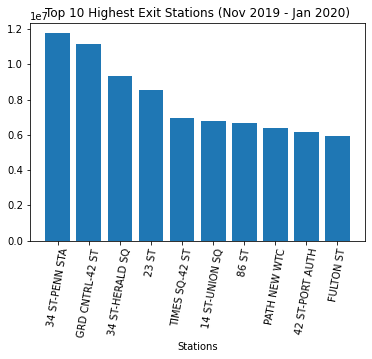

In [ ]:
# bar plot of highest exit stations
plt.bar(x=station_total_exits['STATION'][:10], height=station_total_exits['DAILY_EXITS'][:10])
plt.xticks(rotation=80)
plt.title('Top 10 Highest Exit Stations (Nov 2019 - Jan 2020)')
plt.xlabel('Stations')

In [ ]:
# time series for 34th St - Penn Station

station_daily_34_ST_PENN_STA = stations_daily[(stations_daily['STATION'] == '34 ST-PENN STA')]
station_daily_34_ST_PENN_STA

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,YEAR,MONTH,DAY_OF_MONTH,WEEK_OF_YEAR,DAY_OF_WEEK
5514,34 ST-PENN STA,11/01/2019,177421.0,173107.0,2019,11,1,44,4
5515,34 ST-PENN STA,11/02/2019,98469.0,96323.0,2019,11,2,44,5
5516,34 ST-PENN STA,11/03/2019,100593.0,96302.0,2019,11,3,44,6
5517,34 ST-PENN STA,11/04/2019,178240.0,163605.0,2019,11,4,45,0
5518,34 ST-PENN STA,11/05/2019,174899.0,160018.0,2019,11,5,45,1
...,...,...,...,...,...,...,...,...,...
5503,34 ST-PENN STA,01/20/2020,90492.0,82915.0,2020,1,20,4,0
5504,34 ST-PENN STA,01/21/2020,163466.0,154159.0,2020,1,21,4,1
5505,34 ST-PENN STA,01/22/2020,163645.0,155586.0,2020,1,22,4,2
5506,34 ST-PENN STA,01/23/2020,161268.0,153132.0,2020,1,23,4,3


In [ ]:
# time series for 34th St - Penn Station in November
station_daily_34_ST_PENN_STA_NOV = stations_daily[(stations_daily['STATION'] == '34 ST-PENN STA') & 
                                                  (stations_daily['MONTH'] == 11)]
station_daily_34_ST_PENN_STA_NOV

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,YEAR,MONTH,DAY_OF_MONTH,WEEK_OF_YEAR,DAY_OF_WEEK
5514,34 ST-PENN STA,11/01/2019,177421.0,173107.0,2019,11,1,44,4
5515,34 ST-PENN STA,11/02/2019,98469.0,96323.0,2019,11,2,44,5
5516,34 ST-PENN STA,11/03/2019,100593.0,96302.0,2019,11,3,44,6
5517,34 ST-PENN STA,11/04/2019,178240.0,163605.0,2019,11,4,45,0
5518,34 ST-PENN STA,11/05/2019,174899.0,160018.0,2019,11,5,45,1
5519,34 ST-PENN STA,11/06/2019,182361.0,165472.0,2019,11,6,45,2
5520,34 ST-PENN STA,11/07/2019,181372.0,168105.0,2019,11,7,45,3
5521,34 ST-PENN STA,11/08/2019,173452.0,170546.0,2019,11,8,45,4
5522,34 ST-PENN STA,11/09/2019,92000.0,85541.0,2019,11,9,45,5
5523,34 ST-PENN STA,11/10/2019,85911.0,76534.0,2019,11,10,45,6


Text(0.5, 0, 'Date')

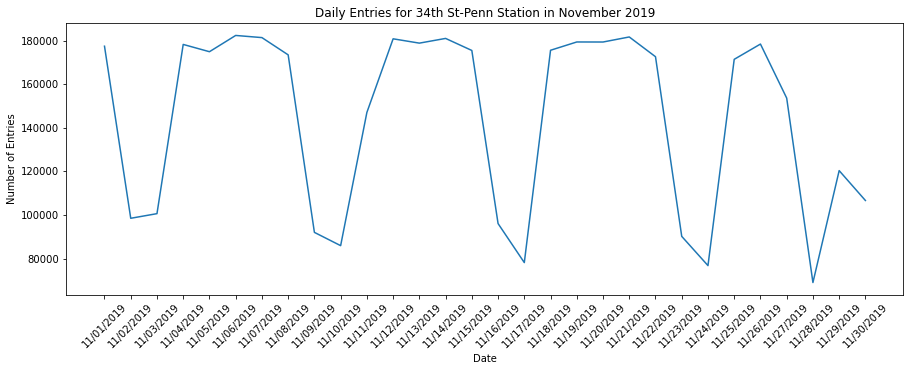

In [ ]:
# line plot for entries to 34th St - Penn Station in November 2019
plt.figure(figsize=(15,5))
plt.plot(station_daily_34_ST_PENN_STA_NOV['DATE'], station_daily_34_ST_PENN_STA_NOV['DAILY_ENTRIES'])
plt.xticks(rotation=45)
plt.title('Daily Entries for 34th St-Penn Station in November 2019')
plt.ylabel('Number of Entries')
plt.xlabel('Date')

In [ ]:
stations_daily.loc[stations_daily['STATION']=='34 ST-PENN STA']['MONTH']==11

5514     True
5515     True
5516     True
5517     True
5518     True
        ...  
5503    False
5504    False
5505    False
5506    False
5507    False
Name: MONTH, Length: 84, dtype: bool

In [ ]:
stations_daily[(stations_daily['STATION']=='34 ST-PENN STA') & (stations_daily['MONTH']==11)]

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,YEAR,MONTH,DAY_OF_MONTH,WEEK_OF_YEAR,DAY_OF_WEEK
5514,34 ST-PENN STA,11/01/2019,177421.0,173107.0,2019,11,1,44,4
5515,34 ST-PENN STA,11/02/2019,98469.0,96323.0,2019,11,2,44,5
5516,34 ST-PENN STA,11/03/2019,100593.0,96302.0,2019,11,3,44,6
5517,34 ST-PENN STA,11/04/2019,178240.0,163605.0,2019,11,4,45,0
5518,34 ST-PENN STA,11/05/2019,174899.0,160018.0,2019,11,5,45,1
5519,34 ST-PENN STA,11/06/2019,182361.0,165472.0,2019,11,6,45,2
5520,34 ST-PENN STA,11/07/2019,181372.0,168105.0,2019,11,7,45,3
5521,34 ST-PENN STA,11/08/2019,173452.0,170546.0,2019,11,8,45,4
5522,34 ST-PENN STA,11/09/2019,92000.0,85541.0,2019,11,9,45,5
5523,34 ST-PENN STA,11/10/2019,85911.0,76534.0,2019,11,10,45,6


In [ ]:
# list of top 5 stations by entry
top_10_entries = list(station_total_entries['STATION'][:10])
top_10_entries

['34 ST-PENN STA',
 'GRD CNTRL-42 ST',
 '23 ST',
 '34 ST-HERALD SQ',
 '42 ST-PORT AUTH',
 'PATH NEW WTC',
 'TIMES SQ-42 ST',
 '14 ST-UNION SQ',
 '86 ST',
 'FULTON ST']

In [ ]:
# list of top 5 stations by exit
top_10_exits = list(station_total_exits['STATION'][:10])
top_10_exits

['34 ST-PENN STA',
 'GRD CNTRL-42 ST',
 '34 ST-HERALD SQ',
 '23 ST',
 'TIMES SQ-42 ST',
 '14 ST-UNION SQ',
 '86 ST',
 'PATH NEW WTC',
 '42 ST-PORT AUTH',
 'FULTON ST']

In [ ]:
# the top 10 entry train stations are also the top 10 exit stations
sorted(top_10_entries) == sorted(top_10_exits)

True

In [ ]:
# creating a station plotter function
# station station name and entries/exits should be entered as a string
def station_plotter(station, entries_exits, month):
    year=0
    if month==1:
        year=2020
    else:
        year=2019
    
        
    month_name = dt.datetime.strptime(str(month), "%m").strftime("%b")
    
    st_df = stations_daily[(stations_daily['STATION']==station) & 
                           (stations_daily['MONTH']==month)]
    plt.figure(figsize=(15,5))
    
    x=st_df['DATE']
    y=st_df[f'DAILY_{entries_exits.upper()}']
    plt.plot(x,y)
    
    plt.xticks(rotation=45)
    plt.title(f'Daily {entries_exits.capitalize()} for {station} in {month_name} {year}')
    plt.ylabel('Number of Entries')
    plt.xlabel('Date')

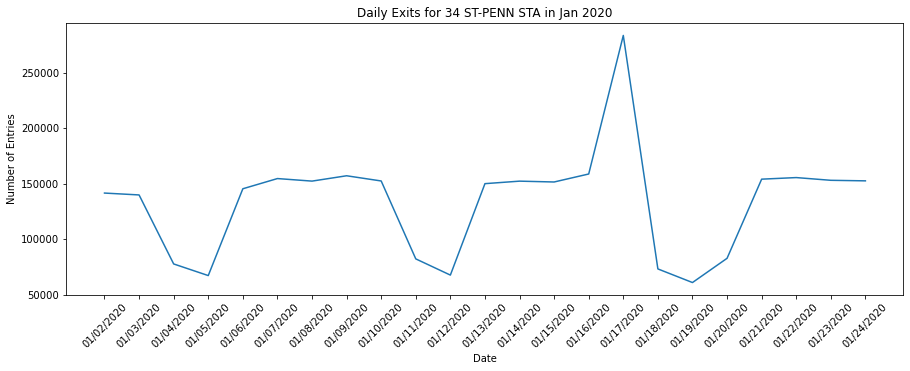

In [ ]:
station_plotter('34 ST-PENN STA', 'Exits', 1)

In [53]:
def november(station_list, entries_exits, month):
    for station in station_list:
        station_plotter(station,entries_exits,month)
        
    plt.figure()

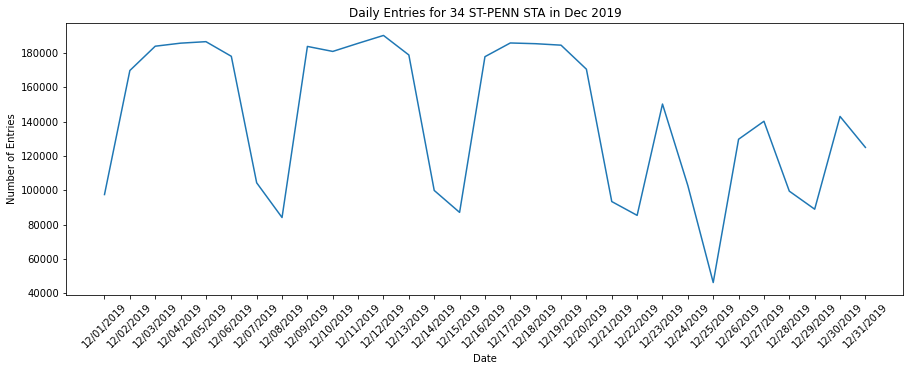

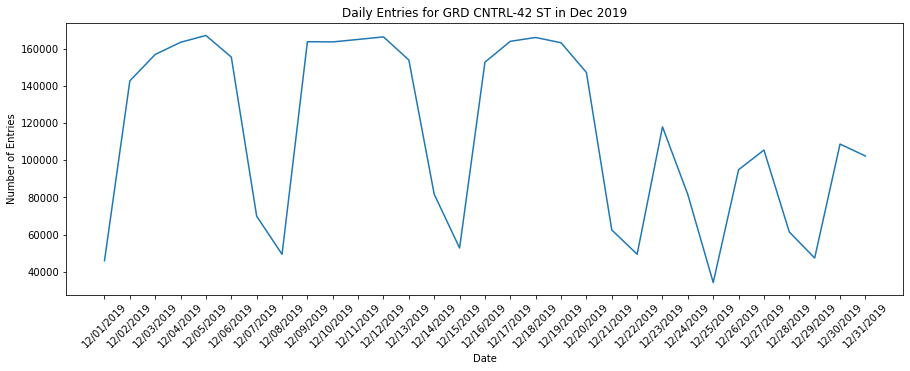

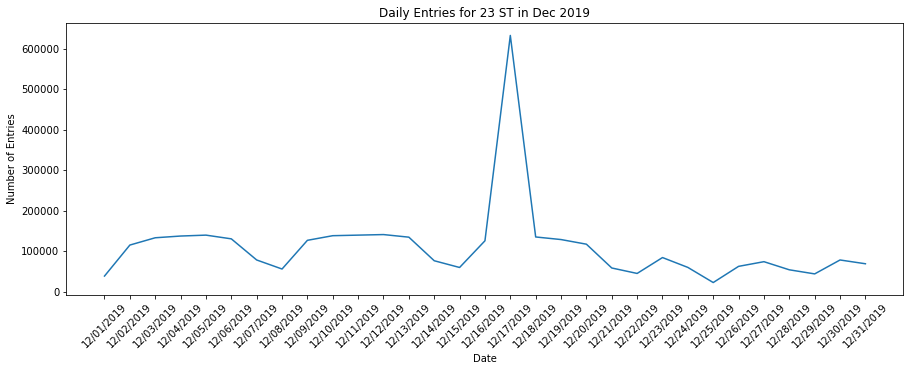

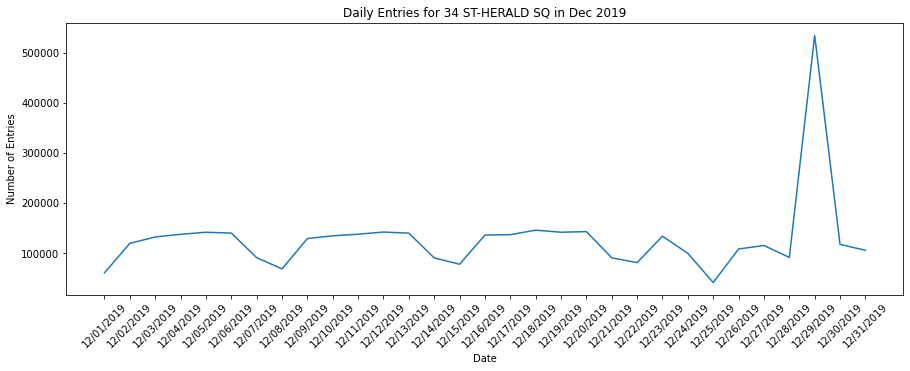

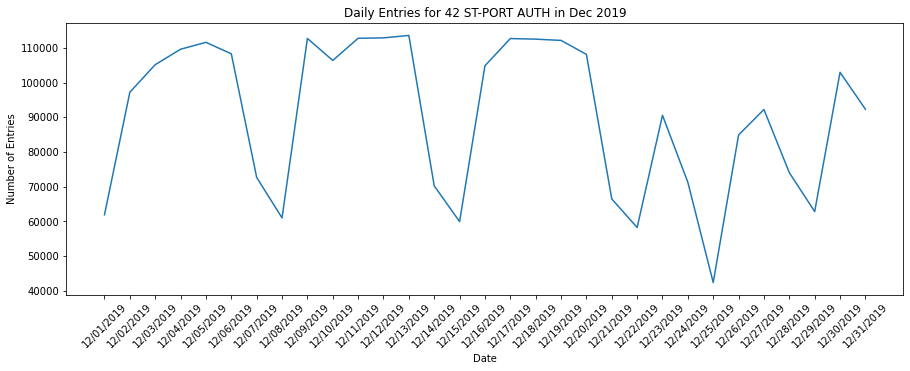

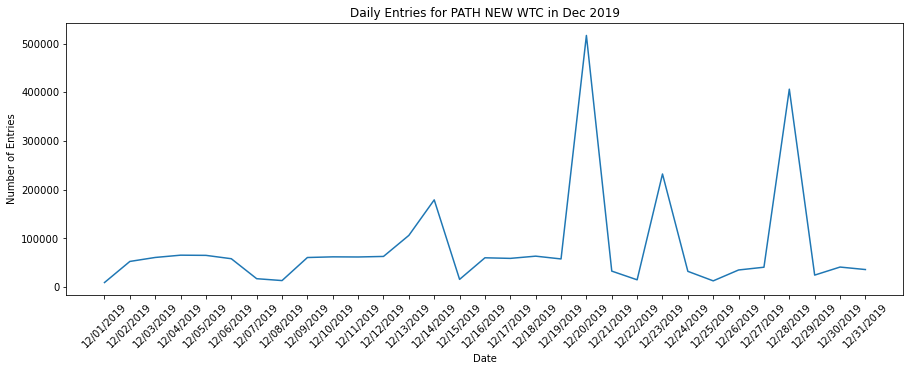

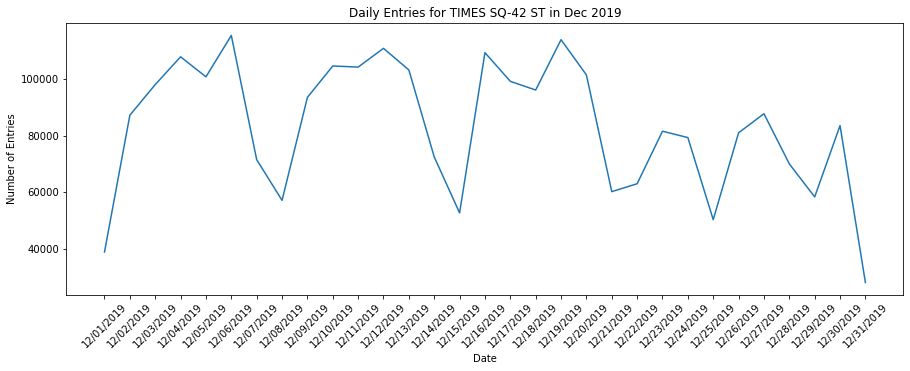

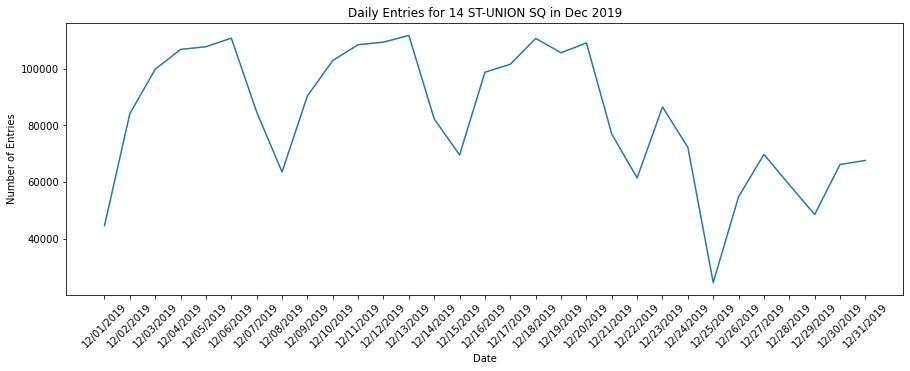

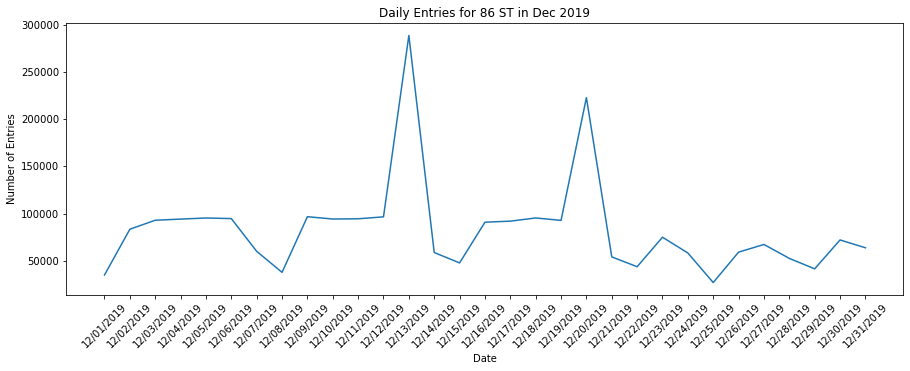

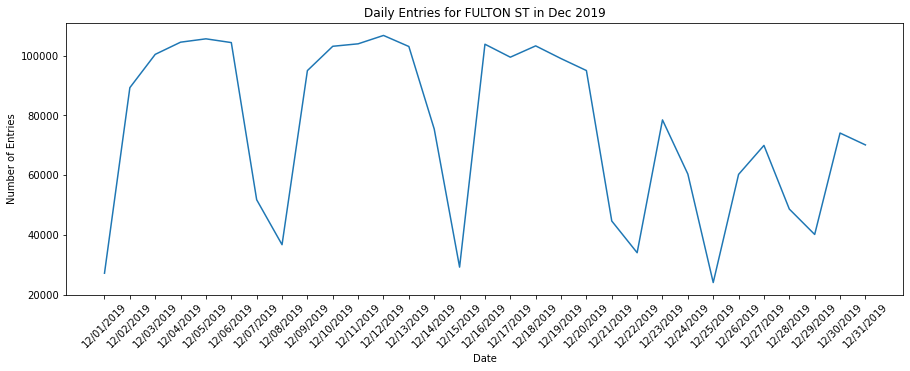

<Figure size 432x288 with 0 Axes>

In [54]:
november(top_10_entries, 'entries', 12)

In [ ]:
# month_name = month_name = dt.datetime.strptime(month, "%m").strftime("%b")
    
#     for station in station_list:
#         st_df = stations_daily[(stations_daily['STATION']==station) & (stations_daily['MONTH']==month)]
#         x=st_df['DATE']
#         y=st_df['DAILY_ENTRIES']
#         plt.plot(x,y)
    
#     plt.xticks(rotation=45)
#     plt.title(f'Daily Entries for Top 10 Stations (Entries) in {month_name} {year}')
#     plt.ylabel('Number of Entries')
#     plt.xlabel('Date')

In [ ]:
# y2 = 2*np.cos(np.pi*x)
# plt.plot(x,y,'g--',linewidth = 3)
# plt.plot(x,y2,color='r',linestyle=':',linewidth = 2)
# plt.legend(['Sine','Cosine']);

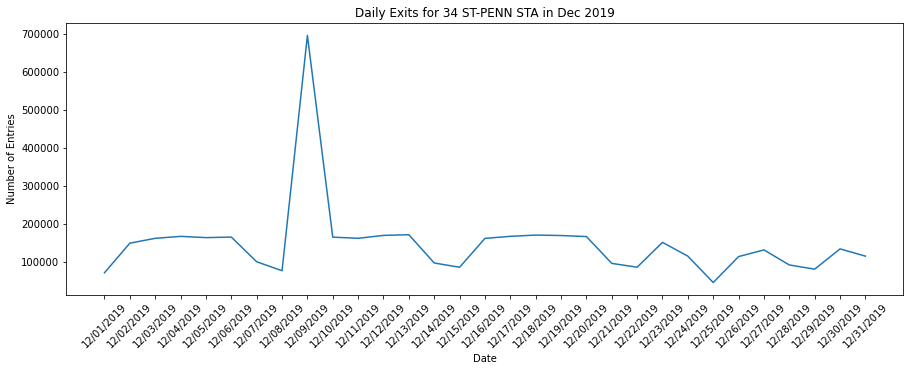

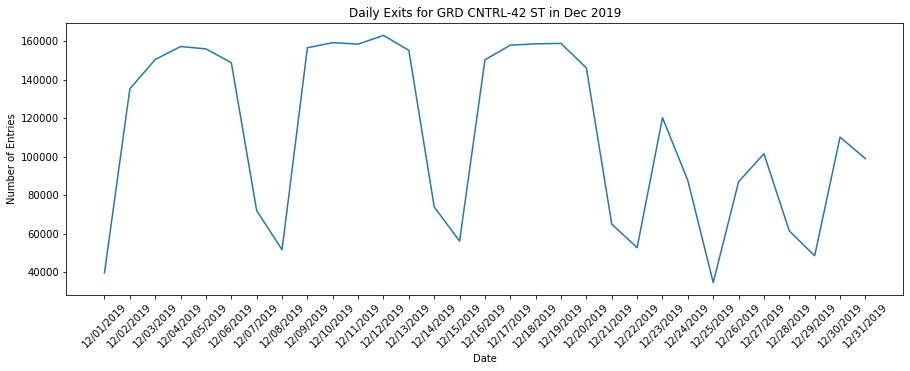

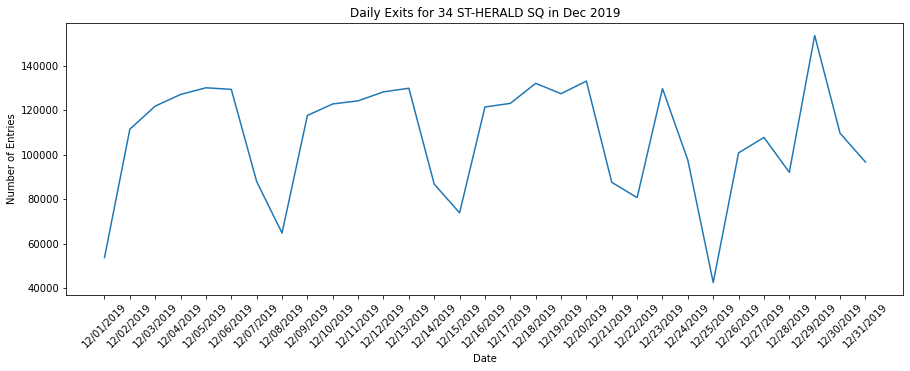

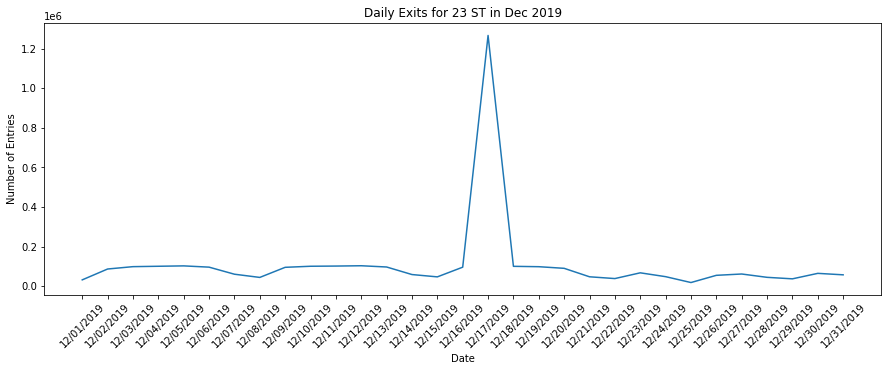

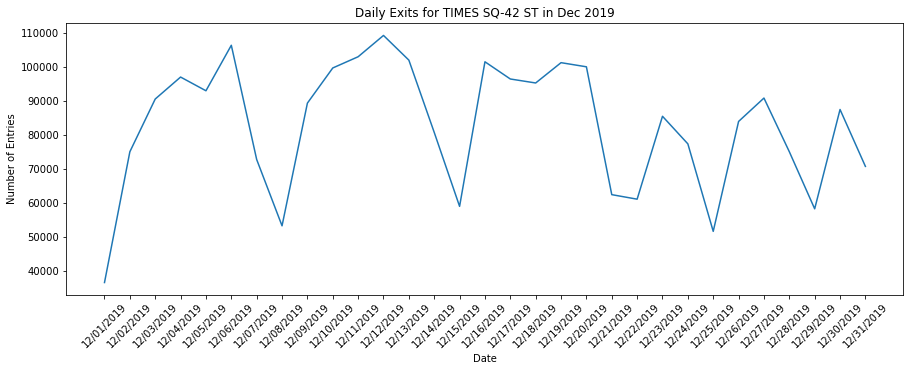

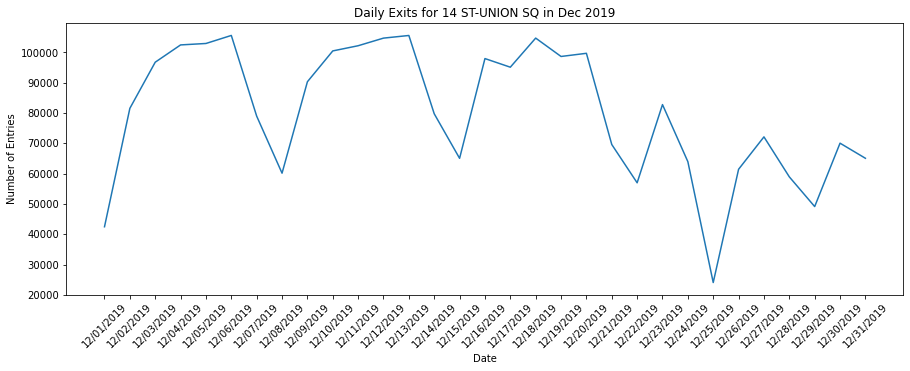

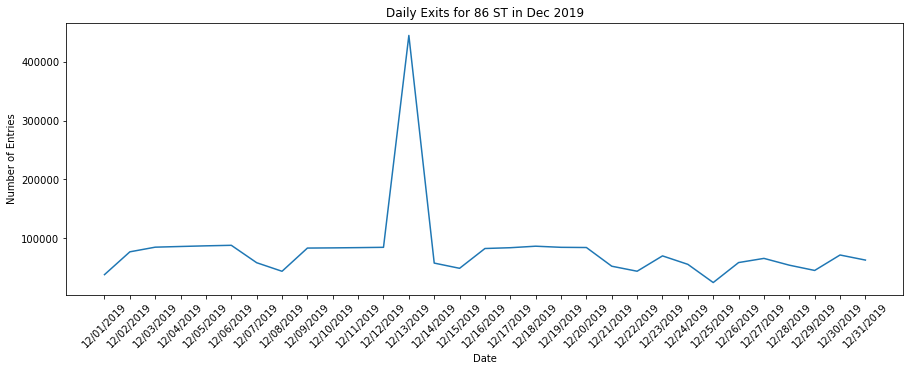

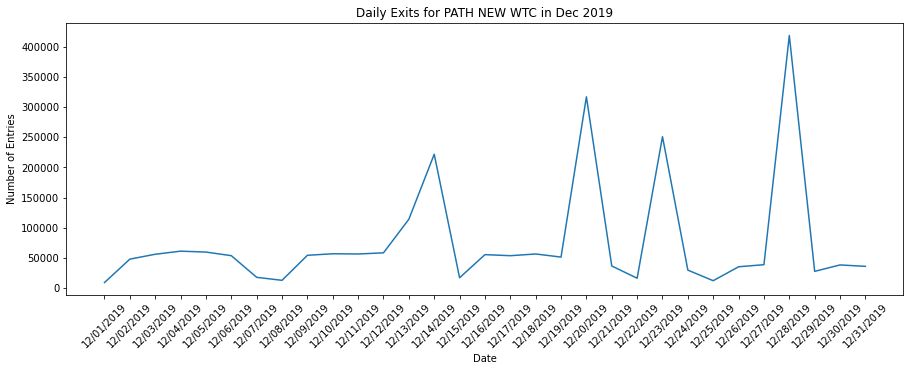

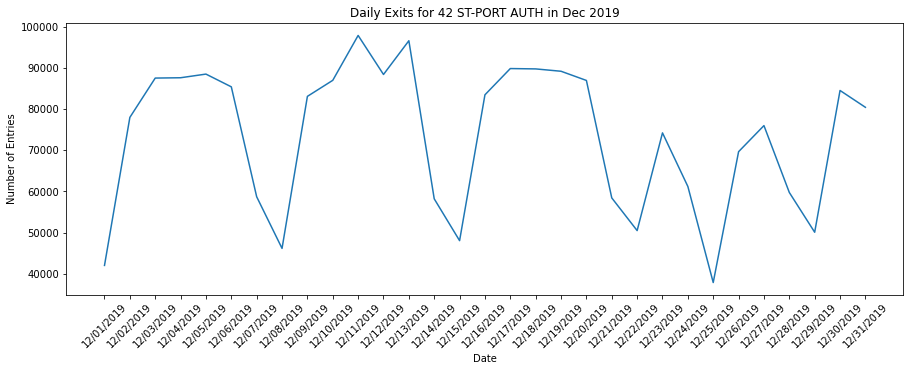

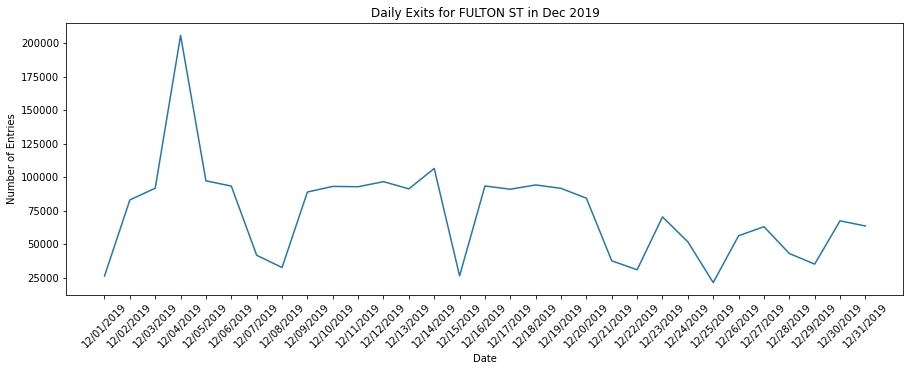

<Figure size 432x288 with 0 Axes>

In [55]:
november(top_10_exits, "exits", 12)

In [280]:
def station_plotter_one_plot(station_list, entries_exits, month):
    year=0
    if month==1:
        year=2020
    else:
        year=2019
    
        
    month_name = dt.datetime.strptime(str(month), "%m").strftime("%b")
    
        
    
    data=[]
    legend_list=[]
    for station in station_list:
        st_df = stations_daily[(stations_daily['STATION']==station) & 
                           (stations_daily['MONTH']==month)]
        x=st_df['DATE']
        y=st_df[f'DAILY_{entries_exits.upper()}']
        data.append((x,y))
        legend_list.append(station)
        
    
        
    plt.figure(figsize=(20,5))
    
    for st in data:
        plt.plot(st[0], st[1])
    
    plt.legend(legend_list,loc=0, frameon=False)
    
    plt.xticks(rotation=70)
    plt.title(f'Daily {entries_exits.capitalize()} for Top 10 Stations in {month_name} {year}')
    plt.ylabel('Number of Entries')
    plt.xlabel('Date')


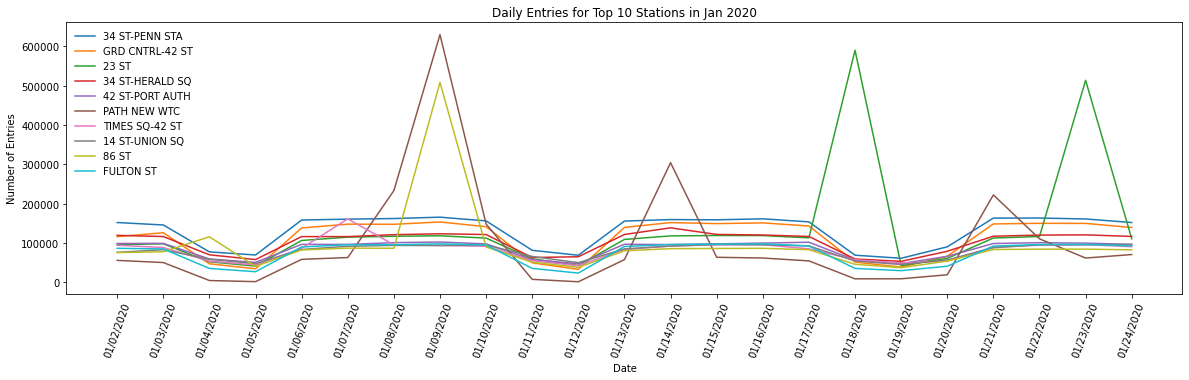

In [285]:
station_plotter_one_plot(top_10_entries, 'entries', 1)

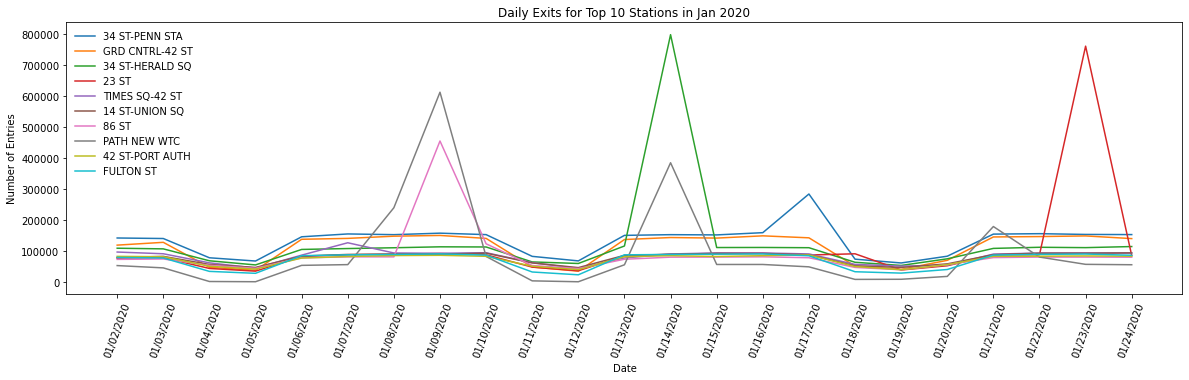

In [286]:
station_plotter_one_plot(top_10_exits, 'exits', 1)

In [294]:
# for stations in station_list get average entries/exits by day, each month
def station_mean_by_day(station_list):
    return (stations_daily[(stations_daily['STATION']).isin(station_list)&
                                     (stations_daily['MONTH'].isin([1,11,12]))]
                      .groupby(['STATION','MONTH','DAY_OF_WEEK'],as_index=False)
                           [['DAILY_ENTRIES','DAILY_EXITS']].mean())

In [295]:
station_means = station_mean_by_day(top_10_entries)
station_means

,STATION,MONTH,DAY_OF_WEEK,DAILY_ENTRIES,DAILY_EXITS
0,14 ST-UNION SQ,1,0,75366.333333,75725.666667
1,14 ST-UNION SQ,1,1,90823.666667,88419.333333
2,14 ST-UNION SQ,1,2,95374.666667,91584.333333
3,14 ST-UNION SQ,1,3,90418.500000,87978.500000
4,14 ST-UNION SQ,1,4,91999.750000,89043.250000
5,14 ST-UNION SQ,1,5,59743.666667,56409.666667
6,14 ST-UNION SQ,1,6,47853.666667,46526.000000
7,14 ST-UNION SQ,11,0,89969.500000,91731.000000
8,14 ST-UNION SQ,11,1,102987.000000,96393.250000
9,14 ST-UNION SQ,11,2,104901.000000,96805.500000


In [302]:
def station_avge_plotter_one_plot(station_list, entries_exits, month):
    year=2019
    if month==1:
        year=2020
    
        
    month_name = dt.datetime.strptime(str(month), "%m").strftime("%b")
    
        
    
    data=[]
    legend_list=[]
    for station in station_list:
        st_df = station_means[(station_means['STATION']==station) & 
                           (station_means['MONTH']==month)]
        x=st_df['DAY_OF_WEEK']
        y=st_df[f'DAILY_{entries_exits.upper()}']
        data.append((x,y))
        legend_list.append(station)
        
    
        
    plt.figure(figsize=(20,5))
    
    for st in data:
        plt.plot(st[0], st[1])
    
    plt.legend(legend_list,loc=0, frameon=False)
    

    plt.title(f'Day of Week {entries_exits.capitalize()} for Top 10 Stations in {month_name} {year}')
    plt.ylabel('Number of Entries')
    plt.xlabel('Day of Week')


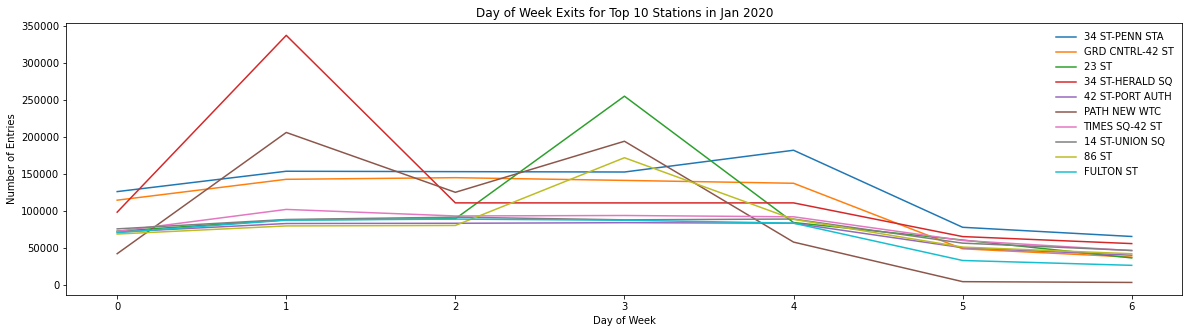

In [308]:
station_avge_plotter_one_plot(top_10_entries, 'exits', 1)

In [150]:
# get average daily entries/exits of all stations in top 10
def all_mean_by_day(station_list, month):
    return (stations_daily[(stations_daily['STATION']).isin(station_list)&
                                          (stations_daily['MONTH']==month)]
                  .groupby(['MONTH','DAY_OF_WEEK'],as_index=False)
                       [['DAILY_ENTRIES','DAILY_EXITS']].mean())

In [160]:
test_df = all_mean_by_day(top_10_entries, 12)
test_df

,MONTH,DAY_OF_WEEK,DAILY_ENTRIES,DAILY_EXITS
0,12,0,107509.720,109389.040
1,12,1,110377.080,115512.140
2,12,2,99219.475,92025.225
3,12,3,110837.000,99600.775
4,12,4,130643.500,117499.025
5,12,5,81214.225,79682.950
6,12,6,61406.400,50285.980


In [311]:
def station_week_plotter(station_list,month):
    year=2019
    if month==1:
        year=2020
    
        
    month_name = dt.datetime.strptime(str(month), "%m").strftime("%b")
    
    labels = list(all_mean_by_day(station_list, month)['DAY_OF_WEEK'])
    entry_means = list(all_mean_by_day(station_list, month)['DAILY_ENTRIES'])
    exit_means = list(all_mean_by_day(station_list, month)['DAILY_EXITS'])
    
    x = np.arange(len(labels))
    width = 0.3
    
    fig,ax = plt.subplots()
    
    enter_bar = ax.bar(x - width/2, entry_means, width, label='Entries')
    exit_bar = ax.bar(x + width/2, exit_means, width, label='Exits')
    
    ax.set_title(f'Avge Entries/Exits Across Top 10 Stations in {month_name} {year}')
    ax.set_xticks(x)
    ax.set_ylabel('Averages')
    ax.set_xlabel('Day of the Week')
    ax.set_xticklabels(labels)
    ax.legend()
    
    plt.show()


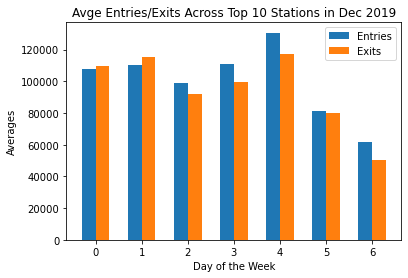

In [314]:
station_week_plotter(top_10_entries,12)

In [196]:
all_mean_by_day(top_10_entries, 12).drop(columns="MONTH")

,DAY_OF_WEEK,DAILY_ENTRIES,DAILY_EXITS
0,0,107509.720,109389.040
1,1,110377.080,115512.140
2,2,99219.475,92025.225
3,3,110837.000,99600.775
4,4,130643.500,117499.025
5,5,81214.225,79682.950
6,6,61406.400,50285.980


Text(0.5, 1.0, 'Avge Day of Week Entries/Exits Across Top 10 Stations in Jan 2020')

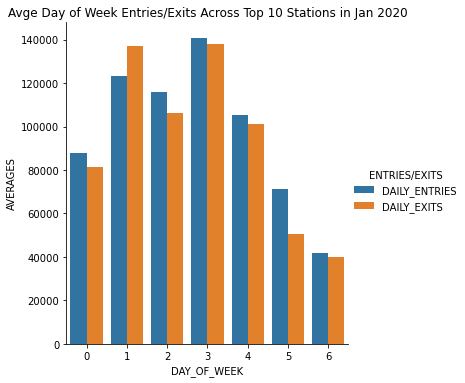

In [323]:
import seaborn as sns

test_df = pd.melt(all_mean_by_day(top_10_entries, 1).drop(columns="MONTH"), 
                  id_vars = 'DAY_OF_WEEK', var_name='ENTRIES/EXITS', 
                  value_name="AVERAGES")

sns.catplot(x='DAY_OF_WEEK', y='AVERAGES', hue='ENTRIES/EXITS', 
            data=test_df, kind='bar')
plt.title("Avge Day of Week Entries/Exits Across Top 10 Stations in Jan 2020")